<a href="https://colab.research.google.com/github/PhamTienLoc/Lab_DM/blob/main/Lab_6_Classification1_21130429_PhamTienLoc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DM Lab 6: Classification1
# 21130429 - Phạm Tiến Lộc


#How Does the Decision Tree Algorithm Work?
The basic idea behind any decision tree algorithm is as follows:


*   Select the best attribute using **Attribute Selection Measures** (ASM) to split the records.
*   Make that attribute a decision node and breaks the dataset into smaller subsets.
*   Start tree building by repeating this process recursively for each child until one of the conditions will match:

  *   All the tuples belong to the same attribute value.
  *   There are no more remaining attributes.
  *   There are no more instances.

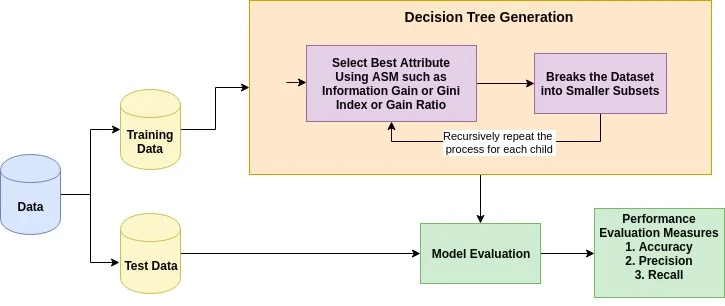









#Information Gain
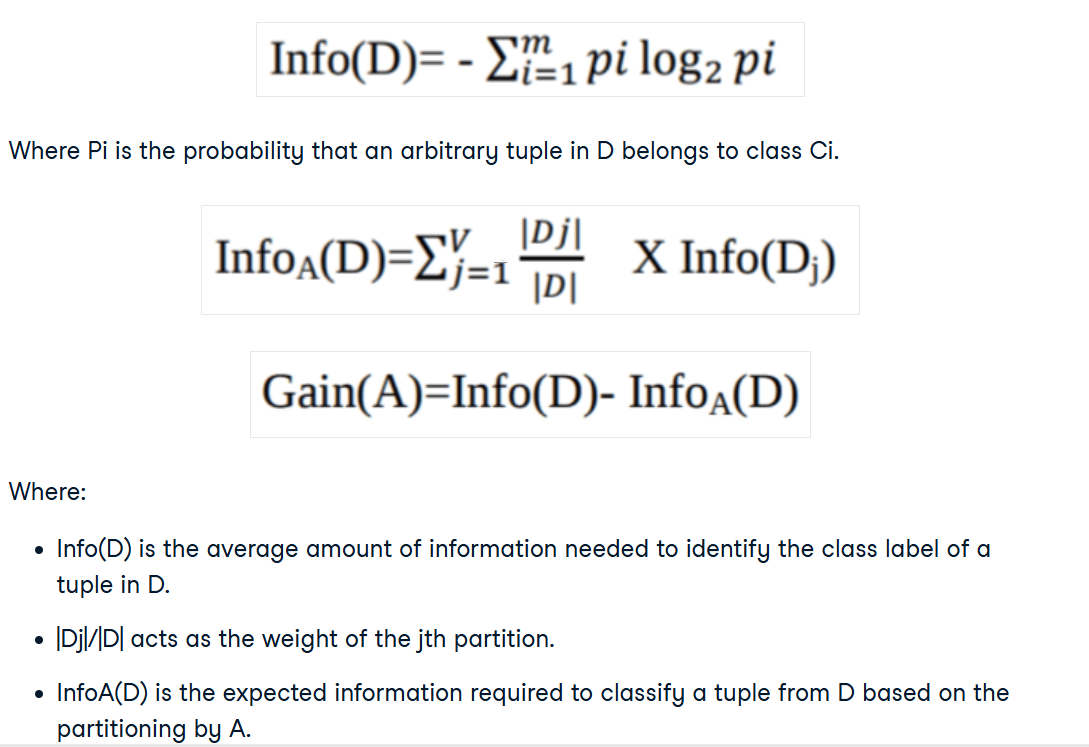

#Gain ratio
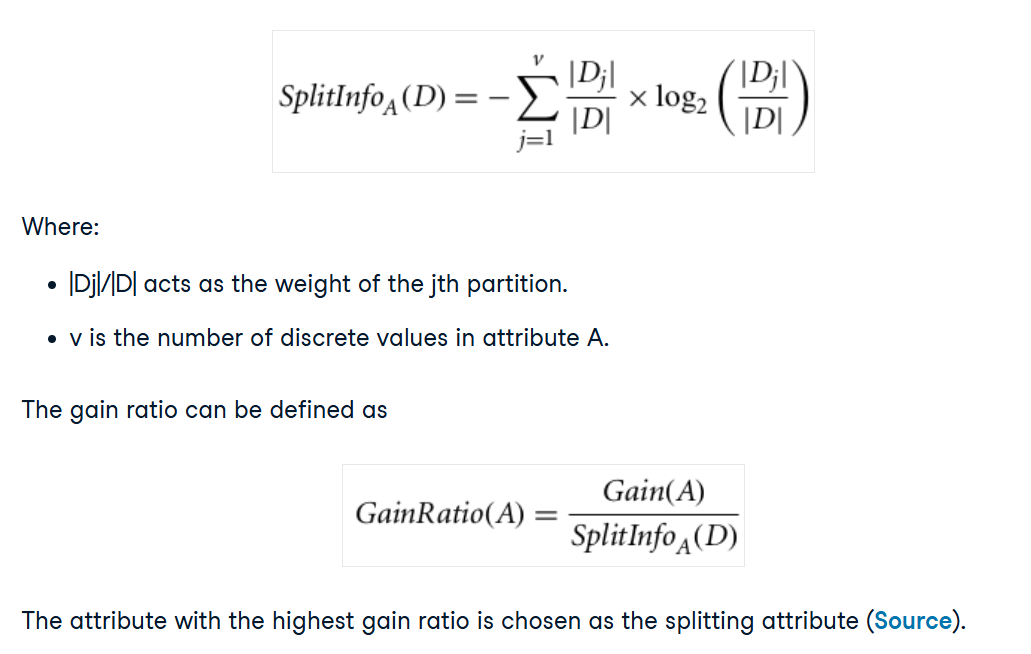

#Gini index
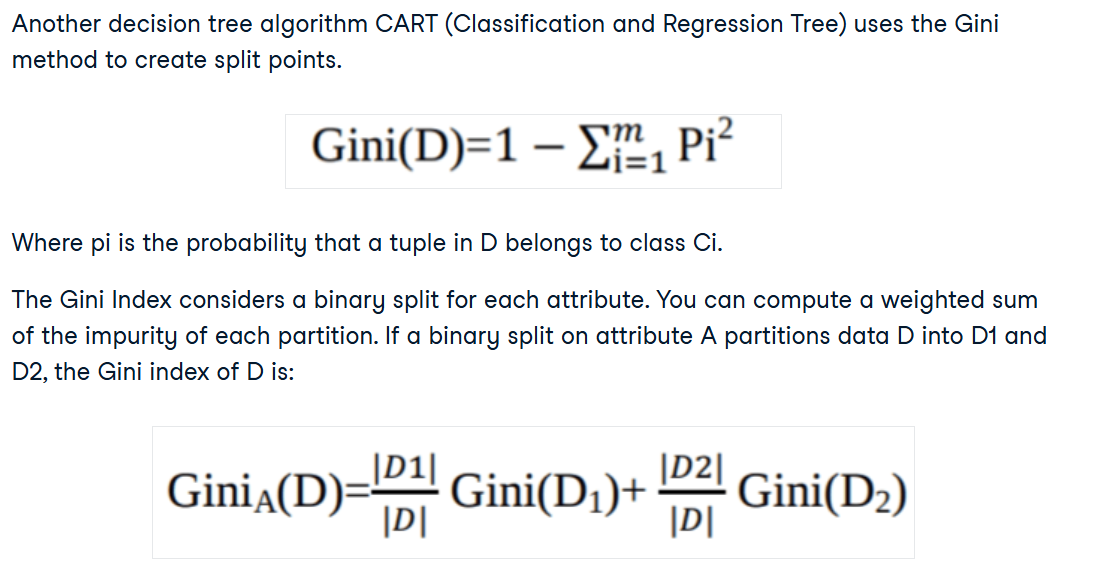

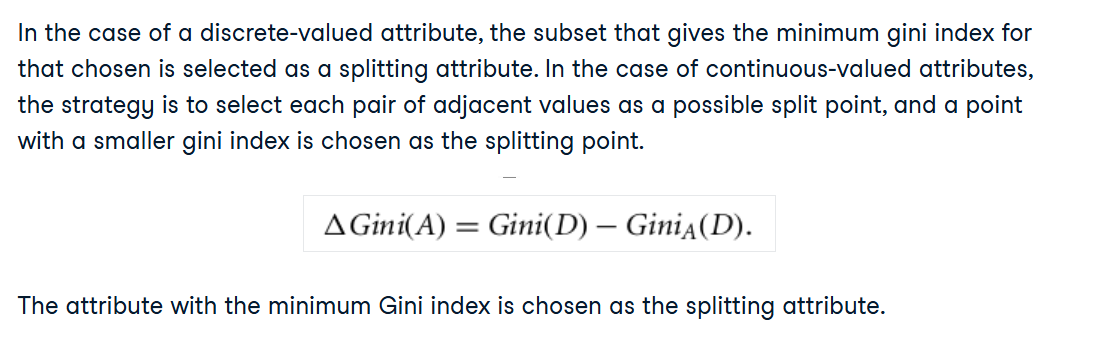

#Decision Tree in Scikit-Learn
(see https://scikit-learn.org/0.15/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)

```
from sklearn import tree
#prepare your X_train, y_train, X_test, y_test from the given dataset
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
```



#KNN classifier in Scikit-Learn
(see )


```
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
from sklearn import tree
# prepare your X_train, y_train, X_test, y_test from the given dataset

clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
```



#Metrics for evaluating the performance of classifiers


```
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
# Accuracy
accuracy = accuracy_score(y_true, y_pred)
# Precision
precision = precision_score(y_true, y_pred)
# Recall
recall = recall_score(y_true, y_pred)
# F1-Score
f1 = f1_score(y_true, y_pred)
# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)
```
Notice that in the case of multi-class label, please use the **average** option for precision, recall metrics (see https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)




---



In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/data'

Mounted at /content/gdrive
/content/gdrive/MyDrive/data


#Import libraries

In [44]:
import pandas as pd
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import cross_val_score
from imblearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier


#**Task 1.** The tennis dataset includes different aspects of the weather (Outlook,	Temperature,	Humidity,	Wind) that are relevant for deciding whether one should play tennis or not.

#Task 1.1. Load training and test sets from the given csv files (tennis_train.csv and tennis_test.csv) and preprocessing the dataset to train decision tree model in the Task 1.2.

In [38]:
#code
tennis_train = pd.read_csv("tennis_train.csv")
tennis_test = pd.read_csv("tennis_test.csv")

discretizer = preprocessing.KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')

tennis_train['Temperature'] = discretizer.fit_transform(tennis_train[['Temperature']])
tennis_test['Temperature'] = discretizer.fit_transform(tennis_test[['Temperature']])

tennis_train['Humidity'] = discretizer.fit_transform(tennis_train[['Humidity']])
tennis_test['Humidity'] = discretizer.fit_transform(tennis_test[['Humidity']])

encoder = preprocessing.LabelEncoder()
tennis_train['Outlook'] = encoder.fit_transform(tennis_train['Outlook'])
tennis_test['Outlook'] = encoder.transform(tennis_test['Outlook'])

tennis_train['Wind'] = tennis_train['Wind'].astype(int)
tennis_test['Wind'] = tennis_train['Wind'].astype(int)

tennis_train['Play'] = encoder.fit_transform(tennis_train['Play'])
tennis_test['Play'] = encoder.transform(tennis_test['Play'])

#Task 1.2. Build a decision tree model from the training set. Then use this model to classify the examples in the test set.

In [48]:
#code
X_train = tennis_train.drop(columns='Play')
y_train = tennis_train['Play']
X_test = tennis_test.drop(columns='Play')
y_test = tennis_test['Play']

dt_clf = tree.DecisionTreeClassifier(max_depth=5)
dt_clf = dt_clf.fit(X_train, y_train)

dt_y_pred = dt_clf.predict(X_test)

#Task 1.3. Plot decision tree using tree.plot_tree(clf)

[Text(0.5, 0.9166666666666666, 'x[0] <= 0.5\ngini = 0.459\nsamples = 14\nvalue = [5, 9]'),
 Text(0.375, 0.75, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.4375, 0.8333333333333333, 'True  '),
 Text(0.625, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.5625, 0.8333333333333333, '  False'),
 Text(0.5, 0.5833333333333334, 'x[3] <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(0.25, 0.4166666666666667, 'x[0] <= 1.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.125, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.375, 0.25, 'x[2] <= 2.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.25, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.75, 0.4166666666666667, 'x[0] <= 1.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.625, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.875, 0.25, 'gini = 0.0\nsamples = 1\nvalue =

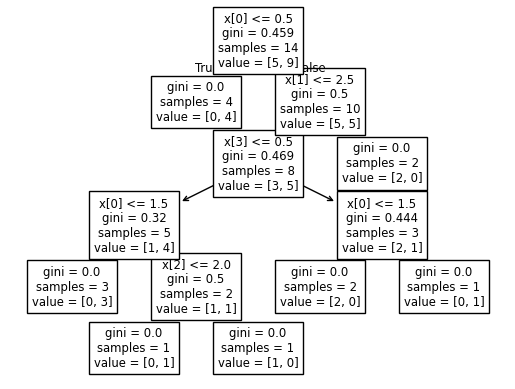

In [46]:
#code
tree.plot_tree(dt_clf)

#Task 1.3. Report confusion matrix and the values of metrics (i.e., accuracy, precision, recall, f1, ...)

In [49]:
#code
# Confusion Matrix
cm = confusion_matrix(y_test, dt_y_pred)
# Accuracy
accuracy = accuracy_score(y_test, dt_y_pred)
# Precision
precision = precision_score(y_test, dt_y_pred)
# Recall
recall = recall_score(y_test, dt_y_pred)
# F1-Score
f1 = f1_score(y_test, dt_y_pred)
# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, dt_y_pred)
roc_auc = auc(fpr, tpr)
roc_auc = auc(fpr, tpr)

print('Confusion Matrix:')
print(cm)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1)
print('ROC AUC:', roc_auc)

Confusion Matrix:
[[2 3]
 [3 6]]
Accuracy: 0.5714285714285714
Precision: 0.6666666666666666
Recall: 0.6666666666666666
F1-Score: 0.6666666666666666
ROC AUC: 0.5333333333333333


#Task 1.4. Apply KNN to the preprocessed dataset and evaluate the performance of the model using metrics as in Task 1.3

In [50]:
#code
kNN_clf = KNeighborsClassifier(n_neighbors=3)
kNN_clf = kNN_clf.fit(X_train, y_train)
kNN_y_pred = kNN_clf.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, kNN_y_pred)
# Accuracy
accuracy = accuracy_score(y_test, kNN_y_pred)
# Precision
precision = precision_score(y_test, kNN_y_pred)
# Recall
recall = recall_score(y_test, kNN_y_pred)
# F1-Score
f1 = f1_score(y_test, kNN_y_pred)
# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, kNN_y_pred)
roc_auc = auc(fpr, tpr)
roc_auc = auc(fpr, tpr)

print('Confusion Matrix:')
print(cm)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1)
print('ROC AUC:', roc_auc)

Confusion Matrix:
[[1 4]
 [1 8]]
Accuracy: 0.6428571428571429
Precision: 0.6666666666666666
Recall: 0.8888888888888888
F1-Score: 0.7619047619047619
ROC AUC: 0.5444444444444444


#Task 2. With the German credit data set from the UCI data set library (http://archive.ics.uci.edu/ml/index.html), which describes the customers of a bank with respect to whether they should get a bank credit or not (credit.csv)

#Task 2.1. Load the credit dataset and apply appropriate preprocessing techniques to attribues


*   Apply **StandardScaler** to numeric features ('duration', 'credit_amount', 'installment_commitment', 'residence_since', 'age', 'existing_credits', 'num_dependents')
*   Apply **OneHotEncoder** categorical features ('credit_history', 'purpose', 'personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans', 'housing', 'job', 'own_telephone', 'foreign_worker')
*   Apply **OrdinalEncoder** to ordinal features ('checking_status', 'savings_status', 'employment')



In [51]:
#code
credit = pd.read_csv("credit.csv")
credit

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,unknown,12,repaid,furniture,1736,< 100 DM,4 - 7 yrs,3,female,none,...,real estate,31,none,own,1,1,1,none,yes,unskilled resident
996,< 0 DM,30,repaid,car (used),3857,< 100 DM,1 - 4 yrs,4,divorced male,none,...,building society savings,40,none,own,1,1,1,yes,yes,mangement self-employed
997,unknown,12,repaid,radio/tv,804,< 100 DM,> 7 yrs,4,single male,none,...,other,38,none,own,1,1,1,none,yes,skilled employee
998,< 0 DM,45,repaid,radio/tv,1845,< 100 DM,1 - 4 yrs,4,single male,none,...,unknown/none,23,none,for free,1,2,1,yes,yes,skilled employee


#Task 2.2. Build a decision tree model with default hyperparameters. Then, plot the decision tree

In [ ]:
#code

#Task 2.3. Report the performance of the model using metrics (i.e., accuracy, precision, recall, f1, ...)

In [ ]:
#code

##Task 2.4. Fine tune the model built in Task 2.3 to find the best hyperparameters. Report the performance of the new model using the same metrics as in the Task 2.3.

In [ ]:
#code

#Task 2.5. Apply KNN algorithm to the preprocessed dataset and evaluate the performance of the model using metrics as in Task 1.3

In [ ]:
#code

#Task 2.6. Fine tune the model built in Task 2.5 to find the best hyperparameters. Report the performance of the new model using the same metrics as in the Task 2.3.

In [ ]:
#code

#Task 2.6. Summary the best metrics obtained from models in Task 2.4 and Task 2.6 (using **PrettyTable**)

In [ ]:
#code

#Task 3. The given dataset (**dataset3**) from the UCI data set library describes 48842 persons from the 1994 US Census.

The task is to build a good classifier for determining whether a person earns over 50.000 $ a year. Beside of being accurate, the built classifier should also have balanced precision and recall.Notice that, the **income** is class feature.

**Hint**: *to find a good classifier (based on KNN or Decision Tree), please apply find-tune technique to find the best hyperparameters for the model*

In [ ]:
#code

#Task 4. The given dataset (**dataset4**) contains the 26 English alphabets as classes, so it's a multiclass classification problem with 26 classes.

Each row in the data set represents an image of a handwritten alphabet including 16 features are derived for each image, such as the width of the box, the ratio of the mean variance of x divided by the width of the box, etc.

Your turn is to build a good classifier using KNN or Decision Tree to recognize letters

In [ ]:
#code